In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
%autoreload 
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import utilities as ut
from pvlib import solarposition
# from dataprep.eda import create_report

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [6]:
from featurewiz import FeatureWiz

# Import the processed data

In [30]:
df = pd.read_csv('df.csv')
df = df.set_index('date_forecast')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,...,hour,day_of_week,quarter,month,year,day_of_year,minute,day,building,pv_measurement
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.6,1.240,1153.6,0.0,0.0,1.0,275.2,0.0,0.0,0.0,...,0,1,1,1,2019,1,0,1,2,0.0
2019-01-01 00:00:00,5.6,1.239,1226.4,0.0,0.0,0.0,275.4,0.0,0.0,0.0,...,0,1,1,1,2019,1,0,1,1,0.0
2019-01-01 00:15:00,5.5,1.241,1137.9,0.0,0.0,1.0,275.1,0.0,0.0,0.0,...,0,1,1,1,2019,1,15,1,2,0.0
2019-01-01 00:15:00,5.6,1.239,1209.3,0.0,0.0,0.0,275.2,0.0,0.0,0.0,...,0,1,1,1,2019,1,15,1,1,0.0
2019-01-01 00:30:00,5.5,1.240,1192.1,0.0,0.0,0.0,275.1,0.0,0.0,0.0,...,0,1,1,1,2019,1,30,1,1,0.0


In [37]:
X_test = pd.read_csv('X_test.csv')
X_test = X_test.set_index('date_forecast')
X_test.index = pd.to_datetime(X_test.index)
X_test = X_test.sort_index()
X_test.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,...,wind_speed_w_1000hPa:ms,hour,day_of_week,quarter,month,year,day_of_year,minute,day,building
date_forecast,,,,,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,4.4,1.286,912.7000,0.0,0.0,0.0,271.7,0.0,0.0,0.0,...,-0.0,0,0,2,5,2023,121,0,1,0
2023-05-01 00:00:00,4.3,1.283,912.3000,0.0,0.0,0.0,271.7,0.0,0.0,0.0,...,-0.0,0,0,2,5,2023,121,0,1,1
2023-05-01 00:00:00,4.2,1.286,2793.5942,0.0,0.0,0.0,271.1,0.0,0.0,0.0,...,-0.0,0,0,2,5,2023,121,0,1,2
2023-05-01 00:15:00,4.3,1.287,912.7000,0.0,0.0,0.0,271.7,0.0,0.0,0.0,...,-0.0,0,0,2,5,2023,121,15,1,0
2023-05-01 00:15:00,4.3,1.283,912.3000,0.0,0.0,0.0,271.7,0.0,0.0,0.0,...,-0.0,0,0,2,5,2023,121,15,1,1


#### Adding some new features:

Trying some intuitive features

In [31]:
# Derived Features
df['temp_dewpoint_diff'] = df['dew_point_2m:K'] - df['t_1000hPa:K']
df['solar_radiation_ratio'] = df['direct_rad:W'] / df['clear_sky_rad:W']

# Weather-related Features
df['wind_speed_magnitude'] = (df['wind_speed_u_10m:ms']**2 + df['wind_speed_v_10m:ms']**2)**0.5
df['cumulative_precipitation'] = df['precip_5min:mm'].rolling(window=12).sum()  # Sum over the past 1 hour (assuming 5-minute intervals : 5*12 = 60 minutes)

# Interaction Features
df['wind_effect'] = df['wind_speed_magnitude'] * df['wind_speed_w_1000hPa:ms']
df['temp_solar_interaction'] = df['t_1000hPa:K'] * df['direct_rad:W']

In [38]:
# Derived Features
X_test['temp_dewpoint_diff'] = X_test['dew_point_2m:K'] - X_test['t_1000hPa:K']
X_test['solar_radiation_ratio'] = X_test['direct_rad:W'] / X_test['clear_sky_rad:W']

# Weather-related Features
X_test['wind_speed_magnitude'] = (X_test['wind_speed_u_10m:ms']**2 + X_test['wind_speed_v_10m:ms']**2)**0.5
X_test['cumulative_precipitation'] = X_test['precip_5min:mm'].rolling(window=12).sum()  # Sum over the past 1 hour (assuming 5-minute intervals : 5*12 = 60 minutes)

# Interaction Features
X_test['wind_effect'] = X_test['wind_speed_magnitude'] * X_test['wind_speed_w_1000hPa:ms']
X_test['temp_solar_interaction'] = X_test['t_1000hPa:K'] * X_test['direct_rad:W']

Trying some pv related features generated using a solar power library. NB assuming the buildings are located in Trondheim

In [34]:
# Function to add solar-related features using pvlib
def add_solar_features_pvlib(df):
    # Fixed latitude and longitude
    latitude = 63.430515
    longitude = 10.395053

    times = pd.to_datetime(df[['year','month', 'day', 'hour', 'minute']])
    altitudes = df['elevation:m']
    temperatures = df['t_1000hPa:K'] - 273.15
    
    # Calculate solar positions
    solar_position = solarposition.get_solarposition(times, latitude, longitude, altitudes, temperature=temperatures)

    # Add solar position features to the dataframe
    df['sun_zenith:d'] = solar_position['apparent_zenith']
    df['sun_equation_of_time'] = solar_position['equation_of_time']

    return df

In [39]:
df = add_solar_features_pvlib(df)
X_test = add_solar_features_pvlib(X_test)

In [36]:
df.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,...,building,pv_measurement,temp_dewpoint_diff,solar_radiation_ratio,wind_speed_magnitude,cumulative_precipitation,wind_effect,temp_solar_interaction,sun_zenith:d,sun_equation_of_time
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.6,1.240,1153.6,0.0,0.0,1.0,275.2,0.0,0.0,0.0,...,2,0.0,-3.3,NaN,2.459675,NaN,-0.0,0.0,139.103522,-3.195874
2019-01-01 00:00:00,5.6,1.239,1226.4,0.0,0.0,0.0,275.4,0.0,0.0,0.0,...,1,0.0,-3.0,NaN,2.459675,NaN,-0.0,0.0,139.103522,-3.195874
2019-01-01 00:15:00,5.5,1.241,1137.9,0.0,0.0,1.0,275.1,0.0,0.0,0.0,...,2,0.0,-3.3,NaN,2.731300,NaN,-0.0,0.0,138.636359,-3.200828
2019-01-01 00:15:00,5.6,1.239,1209.3,0.0,0.0,0.0,275.2,0.0,0.0,0.0,...,1,0.0,-3.1,NaN,2.683282,NaN,-0.0,0.0,138.636359,-3.200828
2019-01-01 00:30:00,5.5,1.240,1192.1,0.0,0.0,0.0,275.1,0.0,0.0,0.0,...,1,0.0,-3.1,NaN,2.954657,NaN,-0.0,0.0,138.026446,-3.205782


In [40]:
X_test.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,...,day,building,temp_dewpoint_diff,solar_radiation_ratio,wind_speed_magnitude,cumulative_precipitation,wind_effect,temp_solar_interaction,sun_zenith:d,sun_equation_of_time
date_forecast,,,,,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,4.4,1.286,912.7000,0.0,0.0,0.0,271.7,0.0,0.0,0.0,...,1,0,-2.1,NaN,4.049691,NaN,-0.0,0.0,101.166019,2.806174
2023-05-01 00:00:00,4.3,1.283,912.3000,0.0,0.0,0.0,271.7,0.0,0.0,0.0,...,1,1,-2.1,NaN,4.049691,NaN,-0.0,0.0,101.166019,2.806174
2023-05-01 00:00:00,4.2,1.286,2793.5942,0.0,0.0,0.0,271.1,0.0,0.0,0.0,...,1,2,-2.6,NaN,3.443835,NaN,-0.0,0.0,101.166019,2.806174
2023-05-01 00:15:00,4.3,1.287,912.7000,0.0,0.0,0.0,271.7,0.0,0.0,0.0,...,1,0,-2.1,NaN,3.996248,NaN,-0.0,0.0,100.792356,2.807480
2023-05-01 00:15:00,4.3,1.283,912.3000,0.0,0.0,0.0,271.7,0.0,0.0,0.0,...,1,1,-2.1,NaN,3.996248,NaN,-0.0,0.0,100.792356,2.807480


In [41]:
# check for missing values
df.isnull().sum()

absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m                   0
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min:idx                   0
pressure_100m:hPa                      0
pressure_50m:hPa

In [42]:
X_test.isnull().sum()

absolute_humidity_2m:gm3             0
air_density_2m:kgm3                  0
ceiling_height_agl:m                 0
clear_sky_energy_1h:J                0
clear_sky_rad:W                      0
dew_or_rime:idx                      0
dew_point_2m:K                       0
diffuse_rad:W                        0
diffuse_rad_1h:J                     0
direct_rad:W                         0
direct_rad_1h:J                      0
effective_cloud_cover:p              0
elevation:m                          0
fresh_snow_12h:cm                    0
fresh_snow_1h:cm                     0
fresh_snow_24h:cm                    0
fresh_snow_3h:cm                     0
fresh_snow_6h:cm                     0
is_day:idx                           0
is_in_shadow:idx                     0
msl_pressure:hPa                     0
precip_5min:mm                       0
precip_type_5min:idx                 0
pressure_100m:hPa                    0
pressure_50m:hPa                     0
prob_rime:p              

In [43]:
# replcae missing values with 0
df = df.fillna(0)
X_test = X_test.fillna(0)

#### Automativ featued analysis and selection using FeatureWiz

In [44]:
FEATURES = list(df.columns)

FEATURES.remove('pv_measurement')

TARGET = 'pv_measurement'

X_train = df[FEATURES]
y_train = df[TARGET]

X_test = X_test[FEATURES]

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (405151, 58)
    Some column names had special characters which were removed...
#### Single_Label R

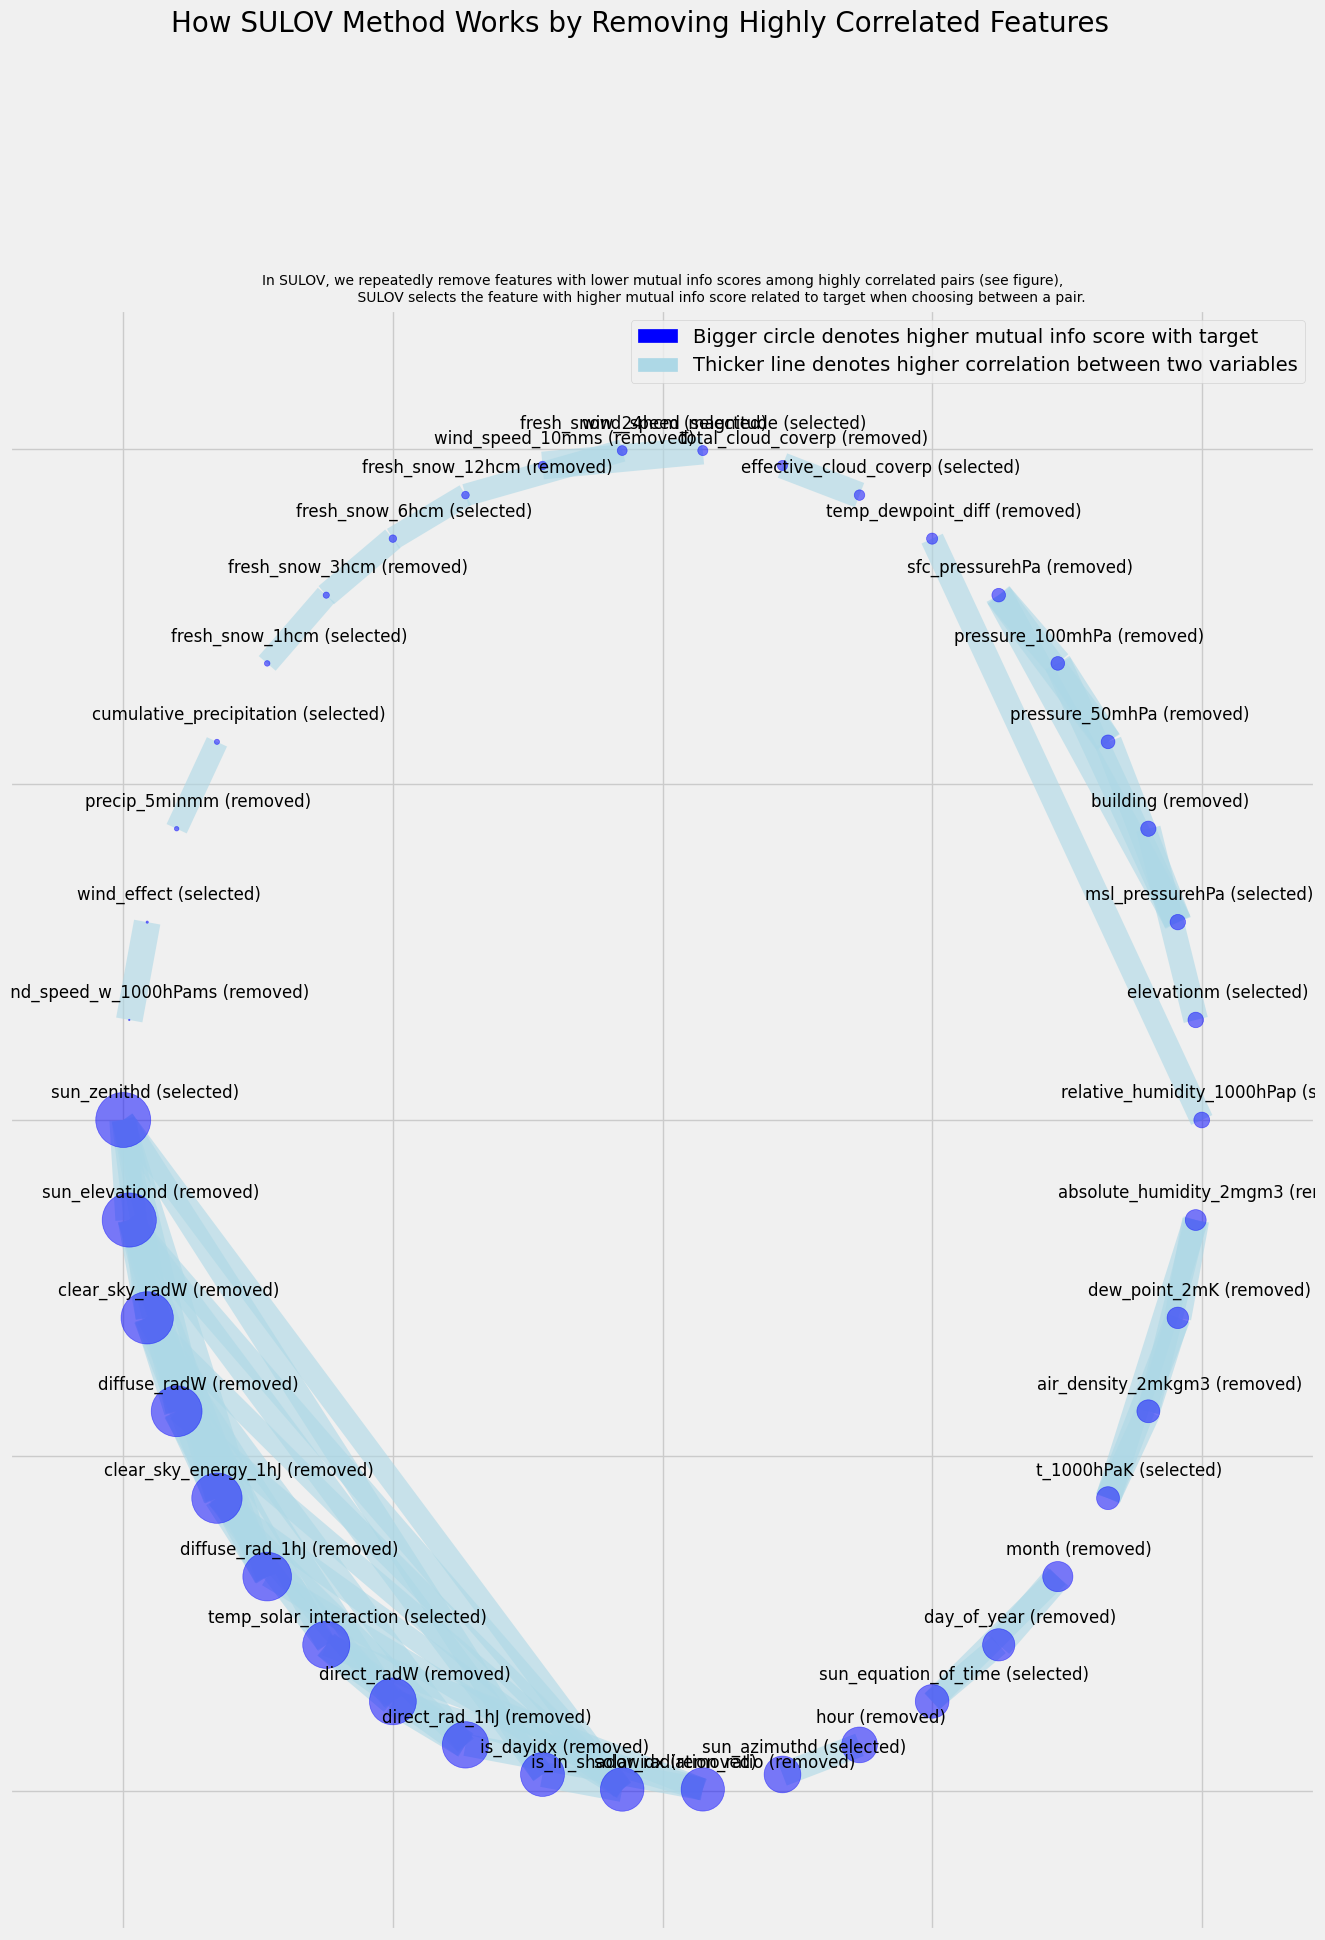

Time taken for SULOV method = 191 seconds
    Adding 0 categorical variables to reduced numeric variables  of 28
Final list of selected 28 vars after SULOV = ['ceiling_height_aglm', 'dew_or_rimeidx', 'precip_type_5minidx', 'prob_rimep', 'rain_waterkgm2', 'snow_waterkgm2', 'super_cooled_liquid_waterkgm2', 'visibilitym', 'wind_speed_u_10mms', 'wind_speed_v_10mms', 'day_of_week', 'minute', 'day', 'sun_zenithd', 'temp_solar_interaction', 'sun_azimuthd', 'sun_equation_of_time', 't_1000hPaK', 'relative_humidity_1000hPap', 'elevationm', 'msl_pressurehPa', 'effective_cloud_coverp', 'wind_speed_magnitude', 'fresh_snow_24hcm', 'fresh_snow_6hcm', 'fresh_snow_1hcm', 'cumulative_precipitation', 'wind_effect']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
######################################################

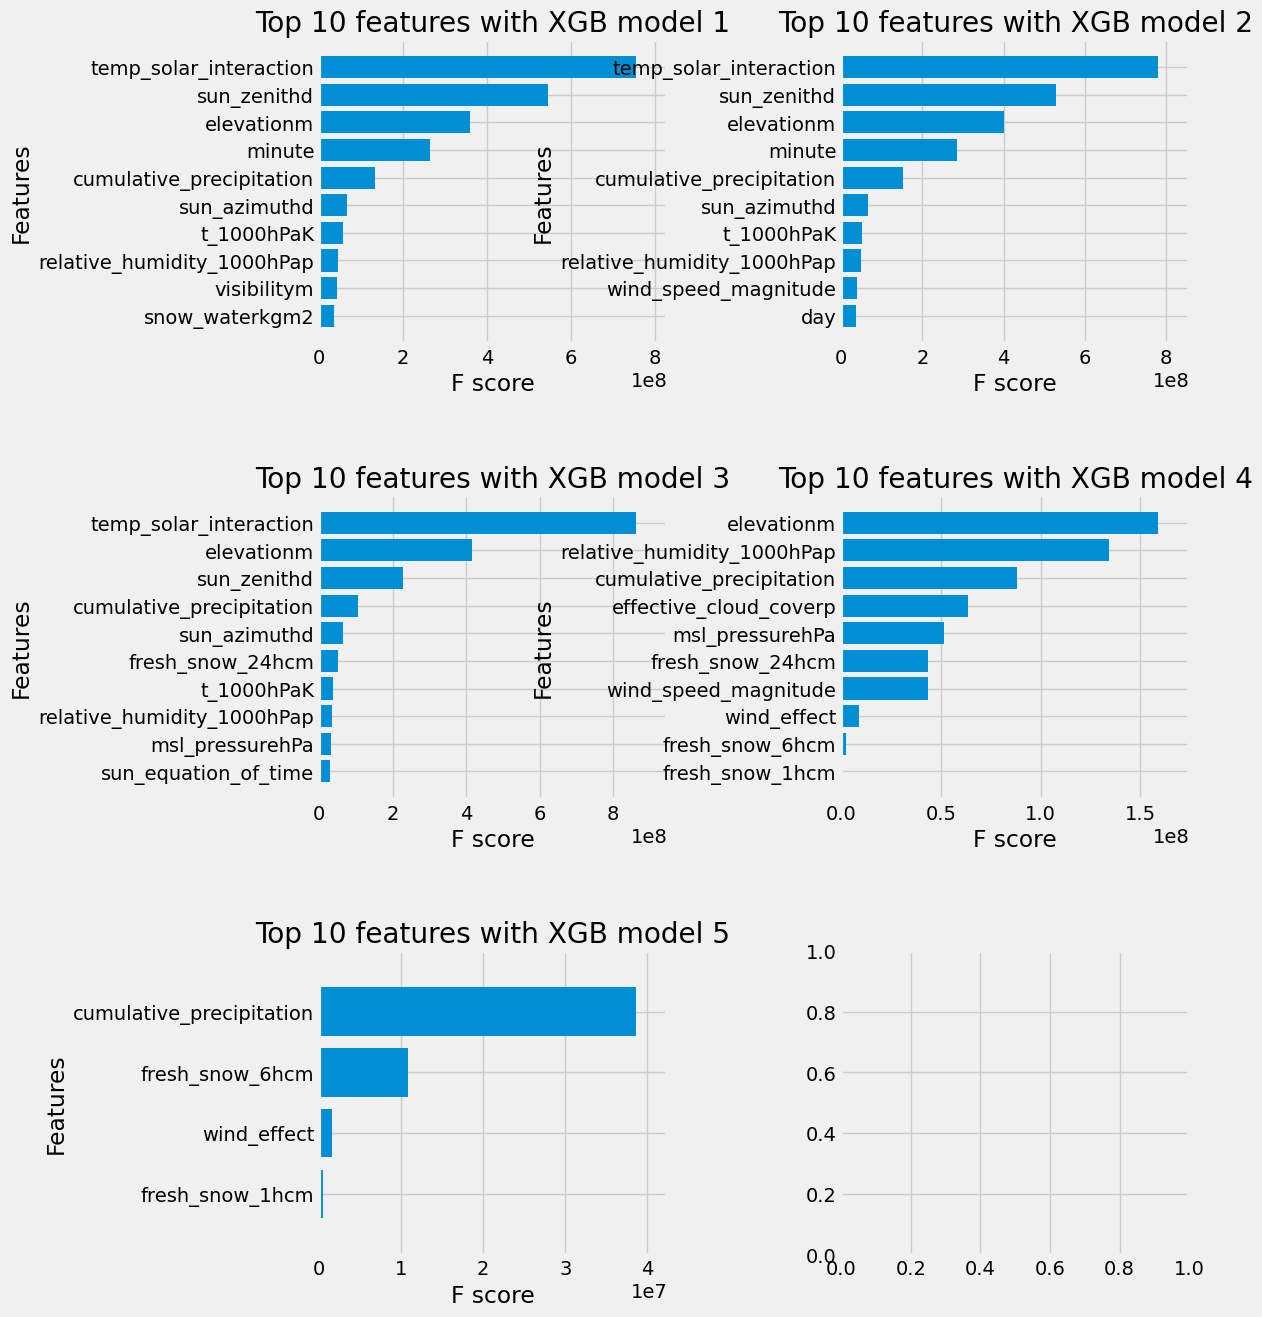

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 18 important features:
['temp_solar_interaction', 'sun_zenithd', 'elevationm', 'minute', 'cumulative_precipitation', 'sun_azimuthd', 'sun_equation_of_time', 't_1000hPaK', 'visibilitym', 'msl_pressurehPa', 'relative_humidity_1000hPap', 'wind_speed_magnitude', 'day', 'effective_cloud_coverp', 'fresh_snow_24hcm', 'wind_effect', 'fresh_snow_6hcm', 'fresh_snow_1hcm']
Total Time taken for featurewiz selection = 209 seconds
Output contains a list of 18 important features and a train dataframe
    Time taken to create entire pipeline = 210 second(s)


In [45]:
fwiz = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_selected = fwiz.fit_transform(X_train, y_train)
X_test_selected = fwiz.transform(X_test)
### get list of selected features ###
feats = fwiz.features  

In [47]:
X_train_selected.shape

(405151, 18)

In [48]:
X_test_selected.shape

(8640, 18)

In [ ]:
# save X_train_selected and X_test_selected
X_train_selected.to_csv('X_train_selected.csv')
X_test_selected.to_csv('X_test_selected.csv')